In [ ]:
from __future__ import print_function
import os.path
import dalmatian as dm
import pandas as pd
import sys
sys.path.insert(0, '../ccle_processing/')
import CCLE_postp_function as ccle
sys.path.insert(0, '../JKBio/')
import Datanalytics as da 
import TerraFunction as terra
%load_ext autoreload
from Helper import *
%autoreload 2
#%load_ext rpy2.ipython
from taigapy import TaigaClient
tc = TaigaClient()
from wand.image import Image as WImage
import numpy as np
from bokeh.plotting import *
from bokeh.models import HoverTool
output_notebook()
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [ ]:
# biggest change genes across time point
# GSEA
counts = pd.read_csv("data/expression.MAX_AMLproject.counts.tsv", sep='\t')
tpm = pd.read_csv("data/expression.MAX_AMLproject.tpm.tsv", sep='\t')
#transcripts = pd.read_csv("data/expression.MAX_AMLproject.transcripts.tsv", sep='\t')b

In [ ]:
tpm

In [ ]:
# we have a number of non zero similar to nb of prot coding genes
np.count_nonzero(counts.values[:,2:])/30

In [151]:
counts.columns

Index(['gene_id', 'transcript_id(s)', '0h-A-RNA', '0h-B-RNA', '0h-C-RNA',
       '1A-24h-RNA', '1A-8h-RNA', '1B-24h-RNA', '1B-8h-RNA', '1C-24h-RNA',
       '1C-8h-RNA', '2A-16h-RNA', '2A-24h-RNA', '2A-2h-RNA', '2A-4h-RNA',
       '2A-8h-RNA', '2B-16h-RNA', '2B-24h-RNA', '2B-2h-RNA', '2B-4h-RNA',
       '2B-8h-RNA', '2C-16h-RNA', '2C-24h-RNA', '2C-2h-RNA', '2C-4h-RNA',
       '2C-8h-RNA', '3A-8h-RNA', '3B-8h-RNA', '3C-8h-RNA', '4A-8h-RNA',
       '4B-8h-RNA', '4C-8h-RNA'],
      dtype='object')

In [4]:
filtered = filterProteinCoding(listofgenes = counts['gene_id'].values, idtype = "ensembl_gene_id")
counts = counts.iloc[filtered]
len(filtered)

21412


19162

In [ ]:
toremove = np.argwhere(counts[counts.columns.values[:2]].values.var(0)==0)
toremove

In [ ]:
counts.drop(toremove,1)

In [5]:
data = counts[counts.columns.values[2:]].values
data = np.log2(1+ (1000000 * (data / data.max(0))))

In [44]:
np.count_nonzero(counts.values[:,2:])/30

13713.666666666666

In [6]:
DMSO = '1'
MS2 = '2'
JQ1 = '3'
MS2_JQ1 = '4'
replicate = '0'

In [7]:
replicate = counts[[val for val in counts.columns if replicate == val[0]]].apply(lambda x: np.log2(1+x))
DMSO = replicate.join(counts[[val for val in counts.columns if DMSO == val[0]]].apply(lambda x: np.log2(1+x)))
MS2 = replicate.join(counts[[val for val in counts.columns if MS2 == val[0]]].apply(lambda x: np.log2(1+x)))
JQ1 = replicate.join(counts[[val for val in counts.columns if JQ1 == val[0]]].apply(lambda x: np.log2(1+x)))
MS2_JQ1 = replicate.join(counts[[val for val in counts.columns if MS2_JQ1 == val[0]]].apply(lambda x: np.log2(1+x)))

## plot the data

In [ ]:
scatter(TSNE(2,40).fit_transform(counts.values[:,2:].apply(np.log1p)), counts.columns[2:], [int(val[0]) for val in counts.columns[2:]])

# lets look at the similarity accross replicates

we have some outliers, else it seems to make some sense and on average, to be extremelly similar!

In [8]:
MS2repA = MS2[[val for val in MS2.columns if 'A' in val[:-4]]]
MS2repB = MS2[[val for val in MS2.columns if 'B' in val[:-4]]]
MS2repC = MS2[[val for val in MS2.columns if 'C' in val[:-4]]]

In [9]:
# reordering
MS2repA = MS2repA[MS2repA.columns.values[[0,3,4,5,1,2]]].apply(np.log1p)
MS2repB = MS2repB[MS2repB.columns.values[[0,3,4,5,1,2]]].apply(np.log1p)
MS2repC = MS2repC[MS2repC.columns.values[[0,3,4,5,1,2]]].apply(np.log1p)

In [173]:
MS2repA.sum(0)

0h-A-RNA      34740.181406
2A-2h-RNA     34941.405320
2A-4h-RNA     34767.067267
2A-8h-RNA     35555.872959
2A-16h-RNA    36190.389925
2A-24h-RNA    34887.628869
dtype: float64

In [174]:
MS2repB.sum(0)

0h-B-RNA      34989.458301
2B-2h-RNA     34895.020454
2B-4h-RNA     34650.943992
2B-8h-RNA     34208.371221
2B-16h-RNA    35918.666016
2B-24h-RNA    34782.099347
dtype: float64

In [175]:
MS2repC.sum(0)

0h-C-RNA      35119.218768
2C-2h-RNA     35068.763691
2C-4h-RNA     33860.231894
2C-8h-RNA     35207.463093
2C-16h-RNA    35386.996931
2C-24h-RNA    35140.388331
dtype: float64

In [10]:
mostvargenesA = np.argsort(MS2repA.var(1).values)
mostvargenesB = np.argsort(MS2repB.var(1).values)
mostvargenesC = np.argsort(MS2repC.var(1).values)

Do we have a good overlap?
- we do only if we first remove the non prot coding genes...

In [177]:
commonvar = set(counts.index.values[mostvargenesA[:2000]].tolist()) & set(counts.index.values[mostvargenesB[:2000]].tolist()) & set(counts.index.values[mostvargenesC[:2000]].tolist())
len(commonvar)

942

## DESeq

In [ ]:
volcano( tooltips, 'Aging Volcano Plot',
                  'Beta Coefficient (log-fold change)', '-log(Q)')

In [85]:
commonvar

{8192,
 12289,
 4099,
 12292,
 10246,
 12296,
 8201,
 4108,
 4112,
 4113,
 10259,
 12317,
 8229,
 10280,
 6184,
 4138,
 8235,
 10283,
 10285,
 8238,
 4139,
 12334,
 8241,
 12338,
 12340,
 8245,
 6202,
 10303,
 6208,
 10305,
 10307,
 12356,
 8267,
 8271,
 10321,
 8276,
 4180,
 10326,
 4182,
 6230,
 12377,
 6231,
 12379,
 8284,
 4187,
 12381,
 4190,
 6233,
 12385,
 10338,
 12387,
 10346,
 12395,
 8300,
 8302,
 12398,
 4206,
 8305,
 12402,
 10356,
 12405,
 12406,
 6262,
 10360,
 10363,
 6269,
 12419,
 10373,
 4230,
 8329,
 8330,
 12427,
 6285,
 4238,
 8335,
 12432,
 8337,
 4241,
 6289,
 10388,
 4254,
 8353,
 12450,
 8355,
 6309,
 4262,
 10407,
 12455,
 6313,
 8367,
 6141,
 12467,
 4275,
 12473,
 12474,
 12475,
 12479,
 10432,
 10433,
 10435,
 12484,
 10444,
 12492,
 4305,
 8404,
 12501,
 4309,
 4313,
 8413,
 12509,
 6369,
 12514,
 8419,
 4324,
 6370,
 12518,
 6372,
 12520,
 10474,
 8428,
 12526,
 10479,
 10481,
 8434,
 12530,
 12534,
 6390,
 6392,
 6393,
 6396,
 12543,
 12545,
 6407,
 105

In [195]:
DMSO.loc[commonvar,'0h-A-RNA'].sum()

3260.4144599092037

In [207]:
DMSO = DMSO[DMSO.columns.values[[0,1,2,4,6,8,3,5,7]]]

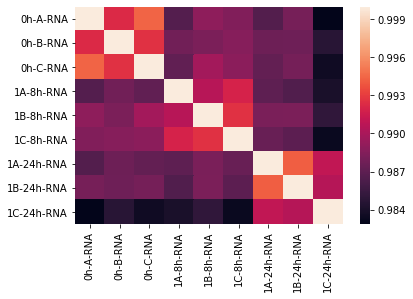

In [208]:
sns.heatmap(DMSO.loc[commonvar].corr(), 
            xticklabels=DMSO.columns.values,
            yticklabels=DMSO.columns.values)

In [205]:
MS2 = MS2[MS2.columns.values[[0,1,2,5,10,15,6,11,16,7,12,17,3,8,13,4,9,14]]]

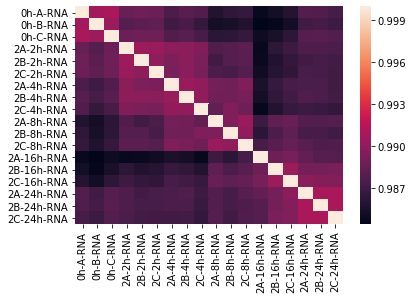

In [206]:
sns.heatmap(MS2.corr(), 
            xticklabels=MS2.columns.values,
            yticklabels=MS2.columns.values)

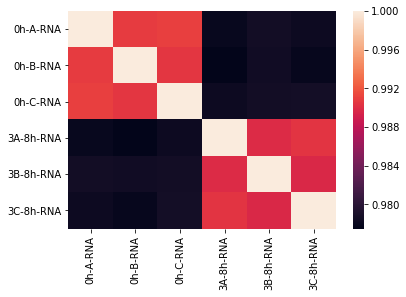

In [198]:
sns.heatmap(JQ1.corr(), 
            xticklabels=JQ1.columns.values,
            yticklabels=JQ1.columns.values)

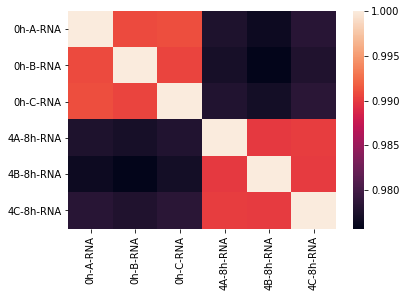

In [199]:
sns.heatmap(MS2_JQ1.corr(),
            xticklabels=MS2_JQ1.columns.values,
            yticklabels=MS2_JQ1.columns.values)

In [11]:
ctf=pd.read_csv('CTF.csv',header=None)[0].values.tolist()
ctf

['MYC',
 'MYB',
 'SPI1',
 'RUNX1',
 'GSE1',
 'IRF2BP2',
 'FLI1',
 'ELF2',
 'ZEB2',
 'IKAROS',
 'GFI1',
 'LMO2',
 'CEBPA',
 'MEF2D',
 'MEF2C',
 'IRF8',
 'MEIS1',
 'RUNX2',
 'ETV6',
 'LDB1',
 'RUNX2',
 'SP1',
 'ZMYND8']

In [10]:
genenames, notparsed = convertGenes(counts['gene_id'].values)

0 could not be parsed... we don't have all genes already


In [96]:
genenames = np.array(genenames)

In [105]:
np.argwhere(genenames[mostvargenesA] == ctf[5])

array([[18832]])

In [19]:
ctf[1] in genenames

True

In [78]:
ctfpos = [genenames.index(val) for val in ctf if val in genenames]
notctfpos = [i for i, val in enumerate(genenames) if val not in ctf]

# Let's look at how they change accross time

how core transcription factors change accross time when the cell is with MS2 Condition

first line is avg count of CTF and line 2 is avg count of protein coding genes 

In [179]:
MS2repA.values.mean(0)

array([1.81297262, 1.82347382, 1.81437571, 1.85554081, 1.8886541 ,
       1.82066741])

In [180]:
ctf_var = MS2repA.values[ctfpos].mean(0)
mean_var = MS2repA.values.mean(0)

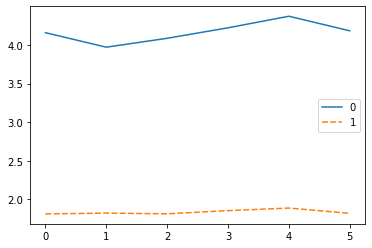

In [181]:
sns.lineplot(data=[ctf_var, mean_var])

In [65]:
MS2repB.values.mean(0)

array([408.58532408, 445.09849963, 462.6499118 , 455.72562259,
       411.87492433, 504.58639286])

In [66]:
ctf_var = MS2repB.values[ctfpos].mean(0)
mean_var = MS2repB.values.mean(0)

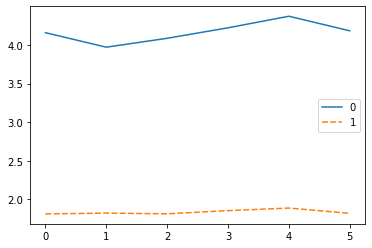

In [182]:
sns.lineplot(data=[ctf_var, mean_var])

# we can verify per tf 

but we expect to find the same results

In [185]:
MS2repC.values.mean(0)

array([1.8327533 , 1.83012022, 1.76705103, 1.83735847, 1.84672774,
       1.83385807])

In [186]:
ctf_var = MS2repC.values[ctfpos]
mean_var = MS2repC.values[notctfpos].mean(0)

In [187]:
data = np.vstack((ctf_var, mean_var))
data

array([[6.3338301 , 5.48736624, 5.24854922, 5.23281838, 5.71508503,
        6.13897897],
       [5.02519545, 4.38052551, 4.33729074, 4.63792775, 4.78256295,
        4.84379331],
       [5.93824835, 5.87543622, 5.77200171, 5.76907071, 5.67771225,
        5.78302486],
       [4.56684507, 4.42268862, 4.50623344, 4.49446206, 4.49880917,
        4.64159854],
       [4.09167433, 4.0111441 , 3.31527632, 3.62354061, 3.94584455,
        4.24749474],
       [5.34185567, 5.20235698, 5.30573975, 5.51769383, 5.45903217,
        5.45361025],
       [3.5295906 , 3.32359614, 3.1565748 , 3.39618484, 3.66227877,
        3.73361379],
       [2.97705901, 2.93863268, 2.89591194, 3.00716665, 2.91560623,
        2.88200351],
       [4.7029319 , 4.79818437, 4.95646066, 4.86275381, 4.61798769,
        4.55702981],
       [4.95229972, 4.54870565, 4.57954464, 4.85491672, 4.90823336,
        5.01800805],
       [4.64323639, 4.36729364, 4.46866294, 4.65662347, 4.98975208,
        5.08115589],
       [5.97217979, 5

In [188]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','a','t','z','0','z')

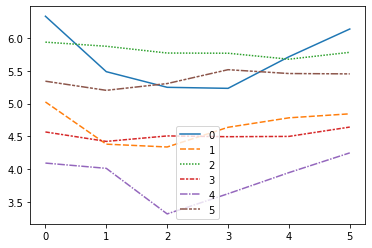

In [221]:
sns.lineplot(data=data[:6].T)

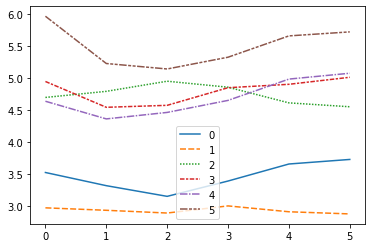

In [190]:
sns.lineplot(data=data[6:12].T)

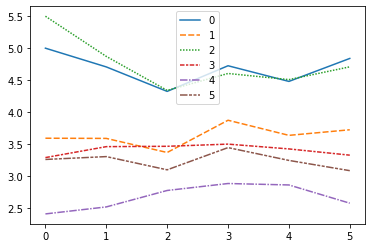

In [191]:
sns.lineplot(data=data[12:18].T)